In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
!pwd

/home/xstefan3/arqmath/compubert


In [137]:
logfdir = "train_sampled_eval4.log"

In [138]:
import re
float(re.search(r"Loss\ val\:\ (\d*\.\d*)", "Step 0/630: Loss val: 0.3030857443809509").group(1))

0.3030857443809509

In [144]:
losses = []
cos_sims = []
for line in open(logfdir, "r"):
    loss_match = re.search(r"Loss\ val\:\ (\d*\.\d*)", line)
    cos_match = re.search(r"Objective\ val\:\ (\d*\.\d*)", line)
    if loss_match is not None:
        losses.append(float(loss_match.group(1)))
    if cos_match is not None:
        cos_sims.append(float(cos_match.group(1)))

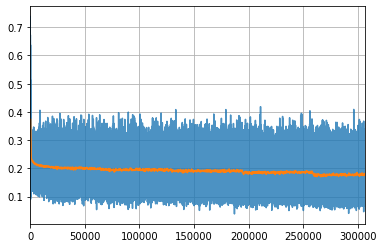

In [145]:
pd.Series(losses).plot(grid=True, alpha=0.8)
pd.Series(losses).rolling(500, win_type='triang').mean().plot(grid=True)

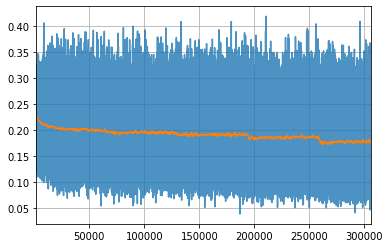

In [147]:
pd.Series(losses).iloc[2000:].plot(grid=True, alpha=0.8)
pd.Series(losses).iloc[2000:].rolling(1000, win_type='triang').mean().plot(grid=True)

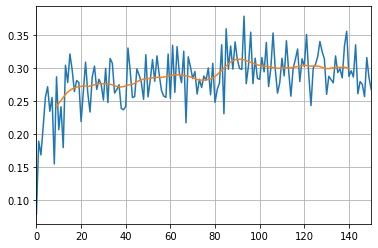

In [148]:
pd.Series(cos_sims).plot(grid=True)
pd.Series(cos_sims).rolling(20, win_type='triang').mean()[10:].reset_index()[0].plot(grid=True)